In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [66]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [67]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Just returned from Chicago, fle..."
1,✅ Trip Verified | BA standards continue to de...
2,Not Verified | Awful. Business class check in...
3,✅ Trip Verified | Not a reliable airline. You...
4,✅ Trip Verified | I take comfort in reading t...


In [68]:
!mkdir data
df.to_csv("data/BA_reviews.csv")

mkdir: cannot create directory ‘data’: File exists


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [69]:
import pandas as pd

df = pd.read_csv('data/BA_reviews.csv')
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | Just returned from Chicago, fle..."
1,1,✅ Trip Verified | BA standards continue to de...
2,2,Not Verified | Awful. Business class check in...
3,3,✅ Trip Verified | Not a reliable airline. You...
4,4,✅ Trip Verified | I take comfort in reading t...


In [70]:
df[['status', 'reviews']] = df['reviews'].str.split('|', 1, expand=True)

<ipython-input-70-bfb35ceded21>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['status', 'reviews']] = df['reviews'].str.split('|', 1, expand=True)


In [71]:
df.columns

Index(['Unnamed: 0', 'reviews', 'status'], dtype='object')

In [72]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [73]:
df.head()

,reviews,status
0,"Just returned from Chicago, flew out 10 days ...",Not Verified
1,BA standards continue to decline every time ...,✅ Trip Verified
2,Awful. Business class check in queue just as...,Not Verified
3,Not a reliable airline. You cannot trust the...,✅ Trip Verified
4,I take comfort in reading the last ten or so...,✅ Trip Verified


In [74]:
df['status'] = df['status'].apply(lambda x: 1 if '✅ Trip Verified' in x else 0)

In [75]:
df.head()

,reviews,status
0,"Just returned from Chicago, flew out 10 days ...",0
1,BA standards continue to decline every time ...,1
2,Awful. Business class check in queue just as...,0
3,Not a reliable airline. You cannot trust the...,1
4,I take comfort in reading the last ten or so...,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2143 non-null   object
 1   status   3666 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.4+ KB


In [77]:
df['status'].value_counts()

0    2537
1    1129
Name: status, dtype: int64

In [80]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 3291
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2143 non-null   object
 1   status   2143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.2+ KB


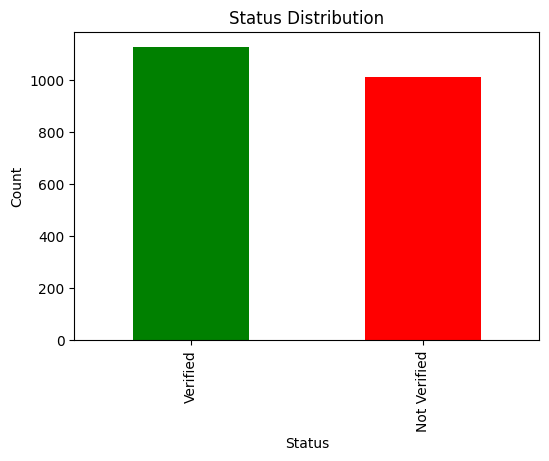

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Verified', 'Not Verified'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Distribution')
plt.show()

In [82]:
import numpy as np
length_reviews = df.reviews.str.len()
print("Maximum Length of a review",max(length_reviews),'characters')
print("Minimum Length of a review",min(length_reviews),'characters')
print("Mean Length of a review",np.mean(length_reviews),'characters')
print("Median Length of a review",np.median(length_reviews),'characters')

Maximum Length of a review 3518 characters
Minimum Length of a review 100 characters
Mean Length of a review 916.4512365842277 characters
Median Length of a review 757.0 characters


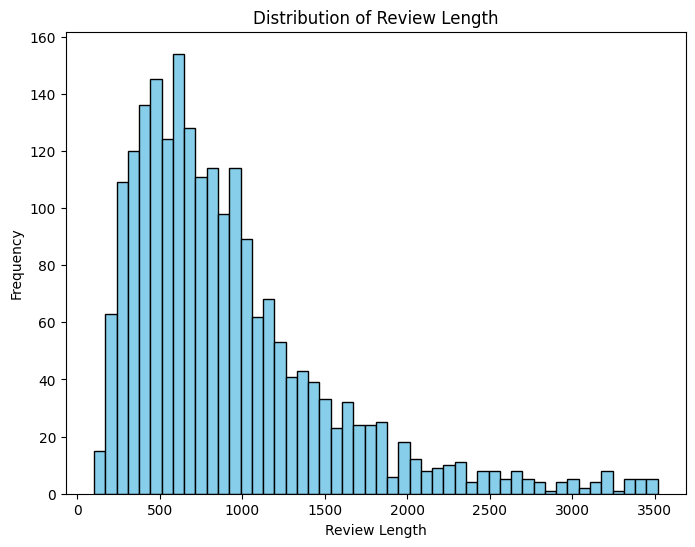

In [83]:
df['review_len'] = df['reviews'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(df['review_len'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


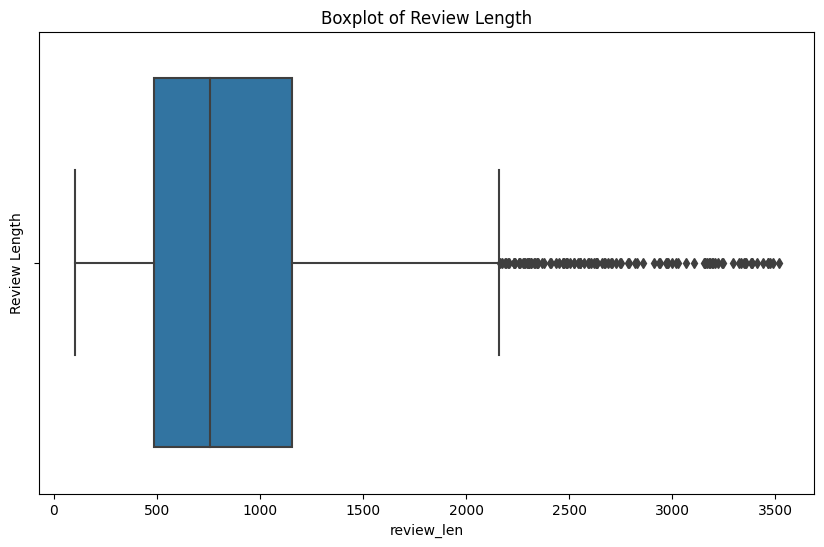

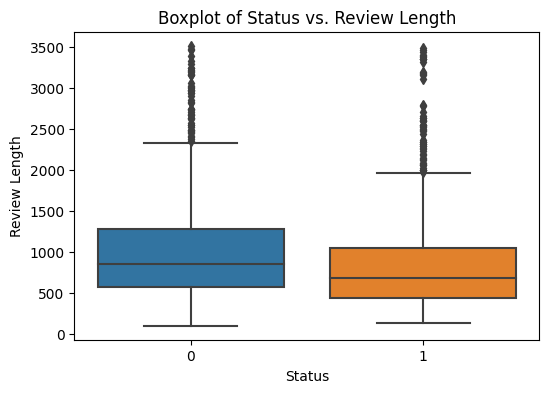

In [84]:
import seaborn as sns

# Create a boxplot for Review Length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="review_len", orient="v")
plt.title("Boxplot of Review Length")
plt.ylabel("Review Length")
plt.show()

# Create a boxplot for Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="status", y="review_len")
plt.title("Boxplot of Status vs. Review Length")
plt.xlabel("Status")
plt.ylabel("Review Length")
plt.show()


In [85]:
df['reviews'][0]

' Just returned from Chicago, flew out 10 days ago on American Airlines absolutely superb in every way, had high expectations on return flight with BA.\u2028What a disappointment.\u2028The Airbus A380 may be nice from a pilots perspective but as a passenger it was awful.\u2028Very uncomfortable seats, the inflight entertainment and flight tracker failed to work throughout the flight, the inflight meal was inedible and the service was mediocre at best. Our short flight from Heathrow to Manchester was much improved, very welcoming and attentive in flight staff and the flight even arrived early. In future we will travel with one of the American carriers. '

In [86]:
import re
from tqdm import tqdm

def normalize(texts):
  """Removes non-alphanumeric characters, digits, and reduce extra white spaces"""
  # Regular expression patterns for removing non-alphanumeric characters and digits
  pattern_non_alnum = re.compile(r'[^a-z0-9\s]', re.IGNORECASE)
  pattern_digits = re.compile(r'\d')


  normalized_texts = []
  for text in tqdm(texts, desc="Normalizing texts"):
    # Convert to lowercase
      text = text.lower()

      # Remove non-alphanumeric characters
      text = pattern_non_alnum.sub(' ', text)

      # Remove digits
      text = pattern_digits.sub('', text)

      # Remove extra white spaces
      text = re.sub(r'\s+', ' ', text).strip()

      normalized_texts.append(text)

  return normalized_texts

In [87]:
df['reviews']=normalize(df['reviews'])
df['reviews'][0]

Normalizing texts: 100%|██████████| 2143/2143 [00:00<00:00, 9008.52it/s]


'just returned from chicago flew out days ago on american airlines absolutely superb in every way had high expectations on return flight with ba what a disappointment the airbus a may be nice from a pilots perspective but as a passenger it was awful very uncomfortable seats the inflight entertainment and flight tracker failed to work throughout the flight the inflight meal was inedible and the service was mediocre at best our short flight from heathrow to manchester was much improved very welcoming and attentive in flight staff and the flight even arrived early in future we will travel with one of the american carriers'

In [88]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

preprocessed_texts = []
for text in tqdm(df['reviews'], desc="Preprocessing text"):
    preprocessed_text = preprocess_text(text)
    preprocessed_texts.append(preprocessed_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Preprocessing text: 100%|██████████| 2143/2143 [00:02<00:00, 849.08it/s]


In [89]:
print(preprocessed_texts[0])

returned chicago flew day ago american airline absolutely superb every way high expectation return flight ba disappointment airbus may nice pilot perspective passenger awful uncomfortable seat inflight entertainment flight tracker failed work throughout flight inflight meal inedible service mediocre best short flight heathrow manchester much improved welcoming attentive flight staff flight even arrived early future travel one american carrier


In [90]:
df['reviews']=preprocessed_texts

In [91]:
from textblob import TextBlob

def sentiment_analysis(df):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    # Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    # Create two new columns ‘Subjectivity’ & ‘Polarity’
    df['sub'] = df['reviews'].apply(getSubjectivity)
    df['pol'] = df['reviews'].apply(getPolarity)

    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'

    df['scores'] = df['pol'].apply(getAnalysis)
    return df

In [92]:
df = sentiment_analysis(df)

In [93]:
df.head()

,reviews,status,review_len,sub,pol,scores
0,returned chicago flew day ago american airline...,0,644,0.522813,0.022500,Positive
1,ba standard continue decline every time fly ti...,1,1102,0.466396,-0.024026,Negative
2,awful business class check queue long economy ...,0,483,0.428571,-0.123810,Negative
3,reliable airline trust timing flight boarding ...,1,899,0.425758,0.019697,Positive
4,take comfort reading last ten review see trave...,1,708,0.358333,-0.175000,Negative


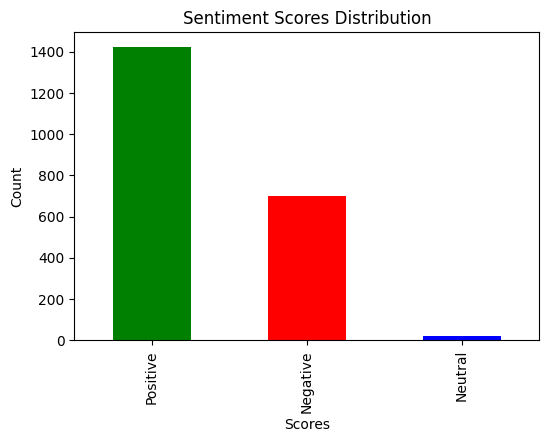

In [94]:
plt.figure(figsize=(6, 4))
df['scores'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Sentiment Scores Distribution')
plt.show()

In [95]:
corr = df[['status','review_len','sub','pol','scores']].corr()
corr

<ipython-input-95-b920d9e81f62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['status','review_len','sub','pol','scores']].corr()


,status,review_len,sub,pol
status,1.000000,-0.144145,0.005019,0.032891
review_len,-0.144145,1.000000,-0.086560,-0.028924
sub,0.005019,-0.086560,1.000000,0.097583
pol,0.032891,-0.028924,0.097583,1.000000


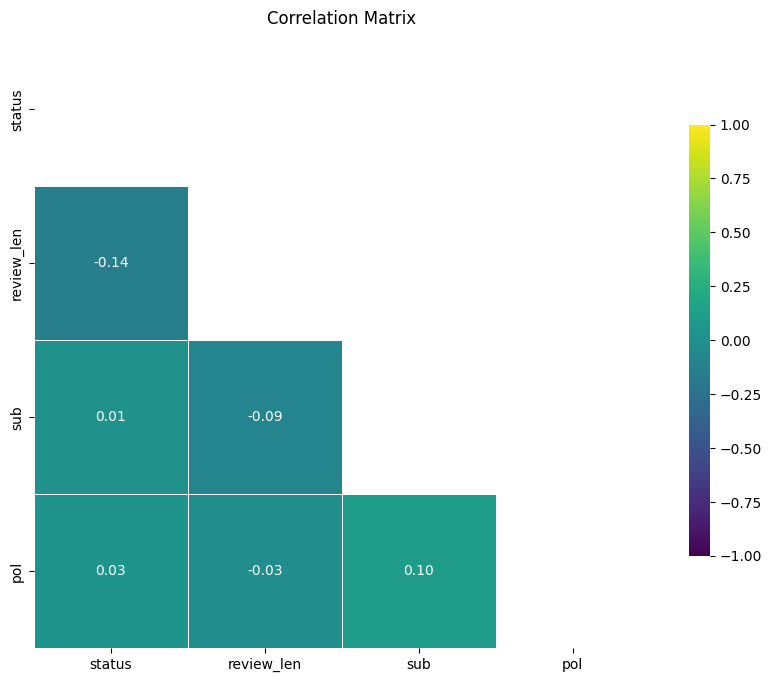

In [96]:
correlation_matrix = corr
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap='viridis', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix")
plt.show()


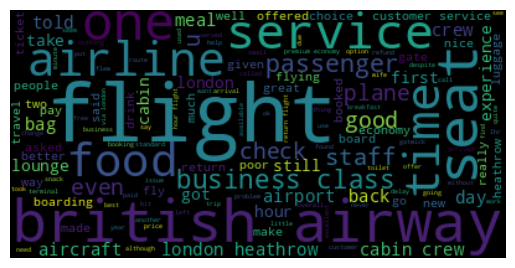

In [97]:
from wordcloud import WordCloud,STOPWORDS

df_text = ' '.join(df['reviews'])

stop_words = set(STOPWORDS)
stop_words.update(['ba'])
cloud_ba = WordCloud(stopwords=stop_words).generate(df_text)
plt.imshow(cloud_ba, interpolation='bilinear')

plt.axis('off')
plt.show()
